# ID3 Decision Tree
## Introduction
ID3, or Itreative Dichotomizer 3, is a decision tree algorithm primarily used for classification tasks. ID3 relies on maximizing ***information gain*** as its guiding partition rule for nodes. The algorithm  relies on a measure of **Entropy** rather than Gini Impurity, though both are very simiar. We discuss the implications of these differences in this notebook, and how to apply ID3.

## Entropy and Information Gain 
In simple terms, entropy is a measure of *randomness* in a set of data. The more uniformly distributed a set of data is with multiple different lables, the more 'random' the data is. That is, **entropy reaches a maximum when the probability of choosing any one label in the set tends towards 50% (equally likely to choose anything.)** Reducing entropy implies reducing this randomness, and thus increasing the proportion of one/few label(s) in a set as opposed to any others. 

Consequently, entropy (much like Gini impurity) is a measure of data **heterogenity** in a node (i.e how unmixed a set of data is.)

Entropy is defined as: 
#### $ Entropy = - \sum_{n=0}^{C}~p_{i}~log~(~p_{i}~) $

where $p_{i}$ is the probability of choosing a label $i$ among $C$ classes. 

We can visualize this function the case of 2 classes, and plot how the entropy changes as a function of the probabilities of observing them: 

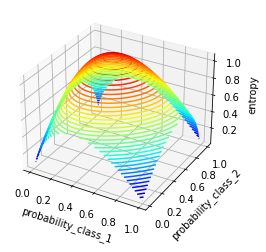

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math

def entropy(x, y):
    
    # We do this for binary classes since (probability of class x) = 1 - (probability of class y)
    # This is equivalent to simply reversing our y array
    y = y[::-1] 
    
    # Compute p * log(p)
    p_log_x = x*np.log2(x)
    p_log_y = y*np.log2(y)
    # Compute entropy
    entropy = - (p_log_x + p_log_y)
    return entropy

# Represents the probabilities of observing some class x
x = np.linspace(0.01, 0.99, 99)
# Represents the probabilities of observing some class y
y = np.linspace(0.01, 0.99, 99)

# Plot 3D contour
X, Y = np.meshgrid(x, y)
Z = entropy(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 40, cmap='jet')
ax.set_xlabel('probability_class_1')
ax.set_ylabel('probability_class_2')
ax.set_zlabel('entropy');

In this binary case, we notice that the entropy is maximized when both classes have an equal probability of being observed (both at 0.5.) We can visualize this as the peak in the graph (entropy = 1.) ***Our goal is to create partitions which produce the largest drop in entropy at each decision node.*** The difference in entropy between two sets of data is referred to as the **information gain.** 

#### Information Gain at node partition =  $entropy_{prior~partition} - entropy_{post~partition}$

As such, we choose to partition a node based on whichever feature maximizes our information gain. This ensures that we are reducing the randomness (and thus the heterogenity) in each node, which implies better classification. 

## Gini impurity vs Entropy
Gini impurity and entropy as metrics for a partition rule are both very similar, though entropy has a slightly greater computational complexity due to the logarithmic term. In most cases, both metrics offer no considerable advantage over one another. Each is a result of two separate fields studying similar classification phenomena (Gini index derives from statistics, and entropy from computer science.) 

## ID3 algorithm 
The ID3 algorithm builds a decision tree using the following steps:

1. Compute the entropy of the data in the current node (we start with the root node, so the whole dataset.) 
2. Compute the **average entropy** for each feature if we were to partition on it
3. Determine the information gain by subtracting the average feature entropy from the entropy in step 1.
4. Choose the feature which produces the **maximum information gain i.e largest entropy reduction** as the partition attribute. 
5. Partition the node into N children, one child for each class in the feature. 
6. Repeat from step 1 for child nodes until stopping criteria is reached (ex: pure leaf node / no more attributes.)

## Average entropy per feature
Assume we have the following fictional dataset: 

<img src="images_and_data/heart_disease.png" width=500 height=500 />

We compute the average entropy for cholsterol as follows:
#### Entropy(cholsterol == high) = $ - \frac{2}{3}~log_{2}(\frac{2}{3})~-~ \frac{1}{3}~log_{2}(\frac{1}{3})$
#### Entropy(cholsterol == normal) = $ - \frac{1}{3}~log_{2}(\frac{1}{3})~-~ \frac{2}{3}~log_{2}(\frac{2}{3})$
#### Average entropy for cholesterol = 
$ p~(cholesterol==high) * Entropy~(cholsterol == high)~+~ p~(cholesterol==normal) * Entropy~(cholsterol == normal)$